<a href="https://colab.research.google.com/github/alphadi/Portfolio_Projects/blob/main/Kaggle/california_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d camnugent/california-housing-prices

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0


In [ ]:
!unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [ ]:
import pandas as pd
import numpy as np

df_housing = pd.read_csv('housing.csv')
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df_housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
df_housing_shuffled = df_housing.sample(n=len(df_housing), random_state=42)
df_housing_shuffled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [ ]:
pd.get_dummies(df_housing_shuffled['ocean_proximity'],dtype=int).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20046,0,1,0,0,0
3024,0,1,0,0,0
15663,0,0,0,1,0
20484,1,0,0,0,0
9814,0,0,0,0,1


In [ ]:
df_housing_shuffled.drop('ocean_proximity',axis=1,inplace=True)
df_housing_shuffled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [ ]:
df_housing_final = pd.concat([df_housing_shuffled.drop('ocean_proximity',axis=1),
                              pd.get_dummies(df_housing_shuffled['ocean_proximity'],dtype=int)],axis=1)
df_housing_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,0,1,0,0,0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,0,1,0,0,0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,0,0,0,1,0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,1,0,0,0,0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,0,0,0,0,1


In [ ]:
df_housing_final = df_housing_final[['longitude',	'latitude',
                                     'housing_median_age',	'total_rooms',
                                     'total_bedrooms',	'population',
                                     'households',	'median_income',
                                     '<1H OCEAN',
                                     'INLAND',	'ISLAND',
                                     'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
df_housing_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,0,1,0,0,0,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,0,1,0,0,0,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,0,0,0,1,0,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,1,0,0,0,0,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,0,0,0,0,1,278000.0


In [ ]:
df_housing_final = df_housing_final.dropna()
len(df_housing_final)

20433

In [ ]:
train_pd, test_pd, val_pd = df_housing_final[:18000], df_housing_final[18000:19217], df_housing_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [ ]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

X_train_preprocessed = preprocessor(X_train)
pd.DataFrame(X_train_preprocessed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.546812,0.809678,-0.845204,-1.131024,-1.205373,-1.185234,-1.223771,-1.164282,0.0,1.0,0.0,0.0,0.0
1,0.779426,-0.816478,0.424414,-0.449297,-0.582644,-0.376819,-0.495051,0.384165,1.0,0.0,0.0,0.0,0.0
2,-1.194974,0.622764,-1.083257,0.098282,0.311044,0.111468,0.217940,-0.585847,0.0,0.0,0.0,0.0,1.0
3,0.659766,-0.774422,1.455978,-0.923621,-0.891632,-0.600729,-0.930186,-0.829127,1.0,0.0,0.0,0.0,0.0
4,-1.115200,0.814351,0.027658,-0.945140,-1.096039,-1.059341,-1.118919,4.455971,1.0,0.0,0.0,0.0,0.0


<Axes: >

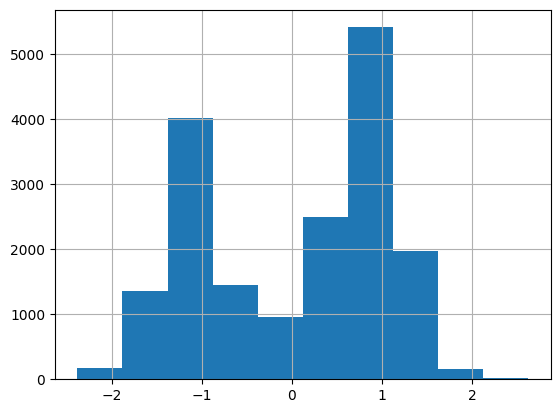

In [ ]:
pd.DataFrame(X_train_preprocessed)[0].hist()

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

In [ ]:
from sklearn.metrics import mean_squared_error as mse,root_mean_squared_error as rmse
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rmse(lm.predict(X_train), y_train), rmse(lm.predict(X_val), y_val)

(68217.49035184126, 70176.74856735402)

K nearest neighbors regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

rmse(knn.predict(X_train), y_train), rmse(knn.predict(X_val), y_val)

(53829.14391218483, 61069.47709294121)

random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=10, random_state=42)
rf.fit(X_train, y_train)

rmse(rf.predict(X_train), y_train), rmse(rf.predict(X_val), y_val)

(43459.71863274391, 55224.02606250137)

Gradient Boosting Regressor


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=200, random_state=42)
gbr.fit(X_train, y_train)

rmse(gbr.predict(X_train), y_train), rmse(gbr.predict(X_val), y_val)

(47979.868498764416, 52475.175320083974)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError


simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2,'relu'))
simple_nn.add(Dense(1,'linear'))


opt = Adam(learning_rate=0.1)
cp = ModelCheckpoint('models/simple_nn.keras',save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])

simple_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp])

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 55507025920.0000 - root_mean_squared_error: 235586.7500 - val_loss: 49287618560.0000 - val_root_mean_squared_error: 222008.1562
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43519635456.0000 - root_mean_squared_error: 208530.1406 - val_loss: 33750827008.0000 - val_root_mean_squared_error: 183713.9844
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29146116096.0000 - root_mean_squared_error: 170685.7031 - val_loss: 24483098624.0000 - val_root_mean_squared_error: 156470.7656
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21515212800.0000 - root_mean_squared_error: 146629.6094 - val_loss: 17602752512.0000 - val_root_mean_squared_error: 132675.3594
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14312890368.0000 - root_mean_squared_error: 119547.6641 - val_loss: 9505100800.0000 - val_root_mean_squared_error: 97494.1094
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [ ]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn.keras')
rmse(simple_nn.predict(X_train), y_train), rmse(simple_nn.predict(X_val), y_val)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(68015.50542768222, 70090.42389944184)

In [ ]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn.keras', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18201985024.0000 - root_mean_squared_error: 128569.2969 - val_loss: 5088249344.0000 - val_root_mean_squared_error: 71331.9688
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4581338624.0000 - root_mean_squared_error: 67657.8906 - val_loss: 4625989120.0000 - val_root_mean_squared_error: 68014.6250
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4340333568.0000 - root_mean_squared_error: 65875.2188 - val_loss: 4531269632.0000 - val_root_mean_squared_error: 67314.7031
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4426752512.0000 - root_mean_squared_error: 66520.3125 - val_loss: 4636151808.0000 - val_root_mean_squared_error: 68089.2891
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4357852672.0000 - root_mean_squared_error: 65984.5938 - val_loss: 4356692992.0000 - val_root_mean_squared_error: 66005.2500
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4132652288.0

In [ ]:
medium_nn = load_model('models/medium_nn.keras')
rmse(medium_nn.predict(X_train), y_train), rmse(medium_nn.predict(X_val), y_val)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(51387.174594473654, 53744.676703564)

In [ ]:
mse(gbr.predict(X_test),y_test)

2895396103.2392883

In [ ]:
rmse(gbr.predict(X_test),y_test)

53808.88498416677